<a href="https://colab.research.google.com/github/AndreyLobato/CapacitacaoML/blob/main/titanic_previsao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capacitação de Machine-Learning: Previsão Titanic

**Objetivo:** Criar um modelo de ML que preveja a quantidade de sobreviventes ao naufrágio do titanic. 

[Link para download dos df's](https://giacapieee.blogspot.com/)

## Carregamento dos dados e Análise Exploratória



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# imports
 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [ ]:
df_train = pd.read_csv("drive/My Drive/Colab Notebooks/3_Capacitacao/titanic/train.csv")
df_test = pd.read_csv("drive/My Drive/Colab Notebooks/3_Capacitacao/titanic/test.csv")
gender_submission = pd.read_csv("drive/My Drive/Colab Notebooks/3_Capacitacao/titanic/gender_submission.csv")

In [ ]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


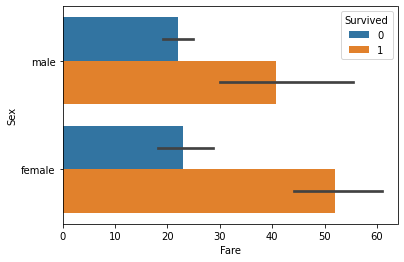

In [ ]:
sns.barplot(data = df_train, y = 'Sex', x = 'Fare', hue = 'Survived')

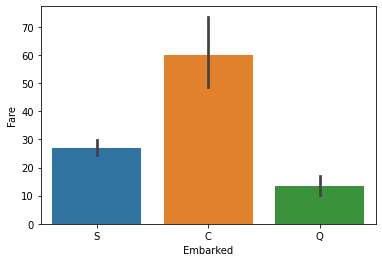

In [ ]:
sns.barplot(data = df_train, x = 'Embarked', y = 'Fare')

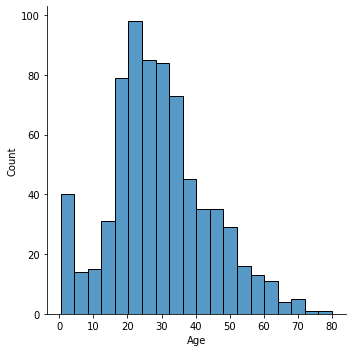

In [ ]:
sns.displot(df_train['Age'])

In [ ]:
sobrporclasse = df_train.groupby(['Pclass'], as_index = False).agg({'Fare': 'mean', 'Survived': 'sum'}).round(2)  
sobrporclasse

,Pclass,Fare,Survived
0,1,84.15,136
1,2,20.66,87
2,3,13.68,119


In [ ]:
df_train['Survived'].value_counts()
#Verificando 136 + 87 + 119 = 342 exatamente a quantidade de sobreviventes. 

0    549
1    342
Name: Survived, dtype: int64

## Transformação dos Dados (Pré-Processamento)

In [ ]:
df_train.head(5)
#Visualizando os dados novamente.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
"""função para transformar os dados da coluna sexo"""
def encode_sex(value):
  if value == 'female':
    return 1
  else:
    return 0

In [ ]:
"""função para transformar os dados da coluna embarked"""
def encode_embarked(value):
  if value == 'S':
    return 0
  elif value == 'Q':
    return 1
  elif value == 'C':
    return 2
  else:
    return -1

In [ ]:
df_train['Sex'] = df_train['Sex'].map(encode_sex)
df_train['Embarked'] = df_train['Embarked'].map(encode_embarked)

#utilizamos a função map que aplica a cada linha da coluna referenciada a função que é passada como parâmetro. 

In [ ]:
df_train.head(5)

#Verificando se as colunas foram alteradas

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


In [ ]:
df_train.info()

#Verificando os tipos de dados criados. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [ ]:
"""Criando feature total acompanhantes para base de treino"""
df_train = df_train.eval('Total_acompanhantes = SibSp + Parch')

In [ ]:
df_train['Total_acompanhantes'].value_counts()
# Variação do nº de acompanhantes 

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Total_acompanhantes, dtype: int64

In [ ]:
df_train = df_train.drop(columns=['PassengerId', 'Name', 'Cabin', 'Ticket'])

#Deletando as colunas

In [ ]:
df_train = df_train.fillna(0)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Survived             891 non-null    int64  
 1   Pclass               891 non-null    int64  
 2   Sex                  891 non-null    int64  
 3   Age                  891 non-null    float64
 4   SibSp                891 non-null    int64  
 5   Parch                891 non-null    int64  
 6   Fare                 891 non-null    float64
 7   Embarked             891 non-null    int64  
 8   Total_acompanhantes  891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


### Pré-Processamento Final 

In [ ]:
def pre_proc(df):
  
  df['Sex'] = df['Sex'].map(encode_sex)
  df['Embarked'] = df['Embarked'].map(encode_embarked)
  df = df.eval('Total_acompanhantes = SibSp + Parch')
  df = df.drop(columns=['PassengerId', 'Name', 'Cabin', 'Ticket'])
  df = df.fillna(0)
  return df

In [ ]:
df_train = pd.read_csv("drive/My Drive/Colab Notebooks/3_Capacitacao/titanic/train.csv")
df_test = pd.read_csv("drive/My Drive/Colab Notebooks/3_Capacitacao/titanic/test.csv")

In [ ]:
df_test = pre_proc(df_test)
df_train = pre_proc(df_train)

#Consolidando

In [ ]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Total_acompanhantes
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,2,1
2,1,3,1,26.0,0,0,7.9250,0,0
3,1,1,1,35.0,1,0,53.1000,0,1
4,0,3,0,35.0,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0,0
887,1,1,1,19.0,0,0,30.0000,0,0
888,0,3,1,0.0,1,2,23.4500,0,3
889,1,1,0,26.0,0,0,30.0000,2,0


## Aplicação do ML e Métricas de Avaliação 

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
X_train = df_train.drop(columns=['Survived'])
y_train = df_train['Survived']

In [ ]:
gender_submission = pd.read_csv("drive/My Drive/Colab Notebooks/3_Capacitacao/titanic/gender_submission.csv")

In [ ]:
y_test = gender_submission['Survived']

In [ ]:
y_test

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [ ]:
X_test = df_test

In [ ]:
lr = LogisticRegression(random_state=0).fit(X_train,y_train)
rd = RandomForestClassifier(random_state=0).fit(X_train,y_train)
nb = GaussianNB().fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
prev_lr = lr.predict(X_test)
prev_rd = rd.predict(X_test)
prev_nb = nb.predict(X_test) 

In [ ]:
accuracy_score(prev_lr,y_test).round(3)

0.947

In [ ]:
accuracy_score(prev_rd,y_test).round(3)

0.801

In [ ]:
accuracy_score(prev_nb,y_test).round(3)

0.892